

<img src="https://saas.ulb.ac.be/wp-content/uploads/2016/09/logo_ulb.png" alt="Drawing" width="300"/>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# INFO-F422 Statistical Foundations for Machine Learning - Classification algorithms

<br>
<br>
<br>
<br>
<br>
<br>
    
**Name**: Erick Escobar Gallardo


**Student-code**: 000489309

**University**: ULB


# **Classification - Real datasets**

---
<table>
  <tr>
    <th></th>
    <th>Classification</th>
    <th>Real Dataset</th>
    <th>Synthetic Dataset</th>
  </tr>
  <tr>
    <td>1.</td>
    <td>Support Vector Machines (SVM)</td>
    <td>Social Networks Ads /  Breast Cancer</td>
    <td>Synthetic data</td>
  </tr>
  <tr>
    <td>2.</td>
    <td>Artificial Neural Networks (ANN)</td>
    <td>Social Networks Ads /  Breast Cancer<br></td>
    <td>Synthetic data</td>
  </tr>
  <tr>
    <td>3.</td>
    <td>Naive Bayes</td>
    <td>Social Networks Ads /  Breast Cancer<br></td>
    <td>Synthetic data</td>
  </tr>
</table>

## 1. Support Vector Machines

The advantages of support vector machines are:

* Effective in high dimensional spaces.

* Still effective in cases where number of dimensions is greater than the number of samples.

* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

![alt text](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png)
---

In [558]:
#Common libs
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import math

### Social Network advertisement dataset

In [559]:
#Load dataset
df = pd.read_csv('Datasets\Social_Network_Ads.csv')
X = df.iloc[:, 2:4]
y = df.iloc[:, 4]
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [560]:
#Split the data into training and testing datasets , for that we use train_test_split from sklearn, we are going to reserve 25% of the data for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train)

     Age  EstimatedSalary
167   35            71000
298   45            79000
391   47            23000
334   57            60000
24    46            23000
..   ...              ...
287   48           138000
31    27           137000
55    24            55000
7     32           150000
297   43           112000

[300 rows x 2 columns]


In [561]:
#The preprocessing module further provides a utility class StandardScaler that implements the Transformer API to compute 
#the mean and standard deviation on a training set so as to be able to later reapply the same transformation 
#on the testing set
#Scaling the data
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)


In [562]:
from sklearn.svm import SVC #support vector classifier
clf = SVC(kernel='linear', random_state=0).fit(X_train, y_train)
print(clf)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


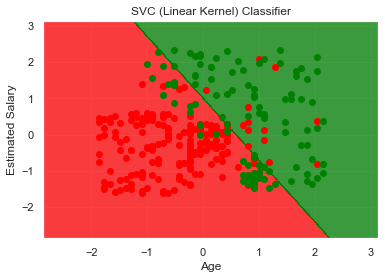

In [563]:

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('SVC (Linear Kernel) Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [564]:
y_pred = clf.predict(X_test)

In [565]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm) #Print the number of good/bad classified points 

[[61  2]
 [12 25]]


In [566]:
from sklearn import metrics
print("Accuracy of Support Vector Machine:",metrics.accuracy_score(y_test, y_pred))

Accuracy of Support Vector Machine: 0.86


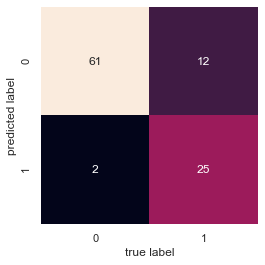

In [567]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred) #Print the number of good/bad classified points 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

### Breast Cancer dataset

In [568]:
df = pd.read_csv('Datasets\Breast-cancer.csv')
df.diagnosis.replace(['M', 'B'], [1, 0], inplace=True)
X = df.iloc[:, 2:]
y =  df.iloc[: , 1]

In [569]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [570]:
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

Linear Kernel

In [571]:
from sklearn.svm import SVC #support vector classifier
clf = SVC(kernel='linear', random_state=0).fit(X_train, y_train)
print(clf)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


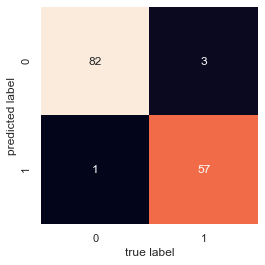

In [572]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred) #Print the number of good/bad classified points 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [573]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98        83
           1       0.98      0.95      0.97        60

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



Radio Basis Function Kernel (RBF Kernel)


In [574]:
clf = SVC(kernel='rbf', random_state=0).fit(X_train, y_train)

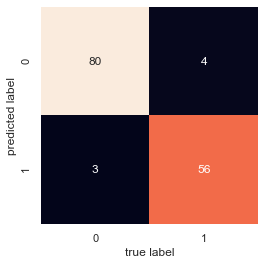

In [575]:
y_pred = clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred) #Print the number of good/bad classified points 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [576]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        83
           1       0.95      0.93      0.94        60

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



## 2. Naive Bayes
Naive Bayes classifiers are built on Bayesian classification methods. These methods rely on Bayes's theorem, which is an equation describing the **relationship of conditional probabilities of statistical quantities**. In Bayesian classification, the main interest is in finding the probability of a label given some observed features, which we can be written as P(L | features).
Bayes theorem express the following:

$P(L | \text { features })=\frac{P(\text { features } | L) P(L)}{P(\text { features })}$
Where:


*   P(L): the probability of label L being true (regardless of the data)   This is known as the prior probability of L.
*   P(features): the probability of the features (regardless of the label). This is known as the prior probability.
*   P(L|features): the probability of label L given the features(data). This is known as posterior probability.
*   P(features| L): the probability of features given that the label L was true. This is known as posterior probability.



$\frac{P\left(L_{1} | \text { features }\right)}{P\left(L_{2} | \text { features }\right)}=\frac{P\left(\text { features } | L_{1}\right)}{P\left(\text { features } | L_{2}\right)} \frac{P\left(L_{1}\right)}{P\left(L_{2}\right)}$

Advantages: 

* They are extremely fast for both training and prediction
* They provide straightforward probabilistic prediction
* They are often very easily interpretable
* They have very few (if any) tunable parameters

When to use Naive Bayes ?

* When faster prediction is required. It also works well in multiclass predictions
* When the Naive assumption holds true, the classifier performs better compared to other models like logistic regression, and you need less training data.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

* When the naive assumptions actually match the data (very rare in practice)
* For very well-separated categories, when model complexity is less important
* For very high-dimensional data, when model complexity is less important

### Social Network advertisement dataset

In [577]:
df = pd.read_csv('Datasets\Social_Network_Ads.csv')
X = df.iloc[:, 2:4]   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 4]
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [578]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [579]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


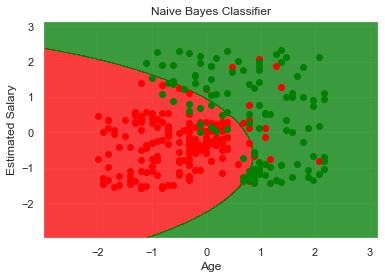

[0 1]
(300,)
(300, 2)


In [580]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Naive Bayes Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()
print(np.unique(y_set))
print(y_set.shape)
print(X_set.shape)

In [581]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 7 25]]


In [582]:
from sklearn import metrics
print("Accuracy of Naives Bayes Model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of Naives Bayes Model: 0.9


It is possible to see that the accuracy of naive bayes based on gaussian naive Bayes classifier, under the assumption is that data from each label is **drawn from a simple Gaussian distribution**, is higher than the accuracy of SVM.

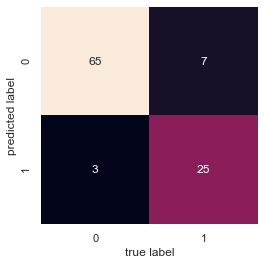

In [583]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred) #Print the number of good/bad classified points 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [584]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



## 3. Artificial Neural Networks

Neural Networks are used to solve artificial intelligence problems. Sometimes they outperform traditional machine learning models because they have the advantages of non-linearity, variable interactions, and a lot of costumizability. 
As a ANN classificator we are going to use a multi-layer perceptron.
A **multilayer perceptron (MLP)** is a class of feedforward artificial neural network (ANN). The term MLP is used ambiguously, sometimes loosely to refer to any feedforward ANN, sometimes strictly to refer to networks composed of multiple layers of perceptrons (with threshold activation).
![alt text](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/05/Neuron.png)

![alt text](http://deeplearning.net/tutorial/_images/mlp.png)

In [585]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

### Social Network advertisement dataset

In [586]:
df = pd.read_csv('Datasets\Social_Network_Ads.csv')
X = df.iloc[:, 2:4]
y = df.iloc[:, 4]
print(df.shape)
df.head()

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [587]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Normalize data

In [588]:
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)


Overkill trying to generalize the model, uses 100 hidden layers

In [589]:
mlp = MLPClassifier(alpha=1, max_iter=800)
mlp.fit(X_train,np.ravel(y_train))

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=800,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[0 1]
(300, 2)
(300,)


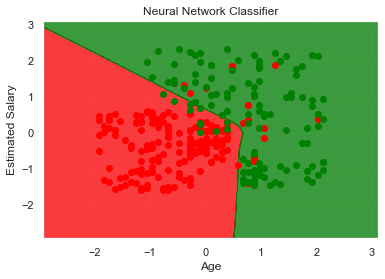

In [590]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, mlp.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
print(np.unique(y_set))
print(X_set.shape)
print(np.ravel(y_set).shape)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[np.ravel(y_set) == j, 0], X_set[np.ravel(y_set) == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Neural Network Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [591]:
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

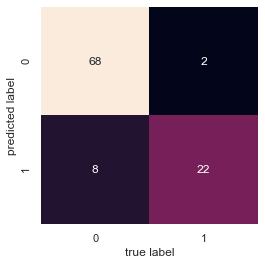

In [592]:
mat = confusion_matrix(y_test, predict_test) #Print the number of good/bad classified points 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [593]:
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        76
           1       0.73      0.92      0.81        24

    accuracy                           0.90       100
   macro avg       0.85      0.91      0.87       100
weighted avg       0.91      0.90      0.90       100



### Breast Cancer dataset

In [594]:
df = pd.read_csv('Datasets\Breast-cancer.csv')
df.diagnosis.replace(['M', 'B'], [1, 0], inplace=True)
print(df.shape)
df.head()

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Normalize data

In [595]:
target_column = ['diagnosis'] 
predictors = list(set(list(df.columns))-set(target_column) -set(['id']))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,911320502.0
diagnosis,569.0,3.725835e-01,4.839180e-01,0.000000,0.000000,0.000000,1.000000e+00,1.0
radius_mean,569.0,5.025717e-01,1.253664e-01,0.248346,0.416222,0.475631,5.613661e-01,1.0
texture_mean,569.0,4.910807e-01,1.094968e-01,0.247200,0.411660,0.479633,5.549898e-01,1.0
perimeter_mean,569.0,4.878994e-01,1.289071e-01,0.232308,0.398780,0.457507,5.522546e-01,1.0
area_mean,569.0,2.618509e-01,1.407094e-01,0.057377,0.168053,0.220352,3.129548e-01,1.0
smoothness_mean,569.0,5.897202e-01,8.607178e-02,0.322093,0.528580,0.586720,6.444308e-01,1.0
compactness_mean,569.0,3.020874e-01,1.529032e-01,0.056109,0.187956,0.268182,3.775333e-01,1.0
concavity_mean,569.0,2.080584e-01,1.867849e-01,0.000000,0.069260,0.144189,3.062324e-01,1.0
concave points_mean,569.0,2.431369e-01,1.928571e-01,0.000000,0.100944,0.166501,3.677932e-01,1.0


The first 2 lines create arrays of the independent (X) and dependent (y) variables, respectively. The third line **splits the data into training and test dataset**, and the fourth line prints the shape of the training and the test data.

In [596]:
X = df[predictors].values
y = df[target_column].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(398, 30)
(171, 30)


In this step, we will build the neural network model using the scikit-learn library's estimator object, 'Multi-Layer Perceptron Classifier'. The first line of code (shown below) imports 'MLPClassifier'. 

**Adam** can be looked at as a combination of RMSprop and Stochastic Gradient Descent with momentum.Adam is an adaptive learning rate method, which means, it computes individual learning rates for different parameters.Adam uses estimations of first and second moments of gradient to adapt the learning rate for each weight of the neural network.

$m_{n}=E\left[X^{n}\right]$

In [597]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,np.ravel(y_train))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [598]:
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

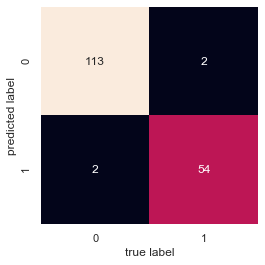

In [599]:
mat = confusion_matrix(y_test, predict_test) #Print the number of good/bad classified points 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [600]:
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       115
           1       0.96      0.96      0.96        56

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



# **Classification - Synthetic datasets**

A synthetic dataset is a repository of data that is generated artificiallly, menaning that is not collected by doing a survey or experiment.

## 1. Support Vector Machines

In [601]:
from sklearn.datasets import make_moons, make_circles, make_classification,make_gaussian_quantiles

In [602]:
h = .02
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

In [603]:
classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1)]
names = [ "Linear SVM", "RBF SVM"]


In [604]:
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.4, random_state=0),
            make_circles(noise=0.3, factor=0.5, random_state=1),
            linearly_separable
            ]


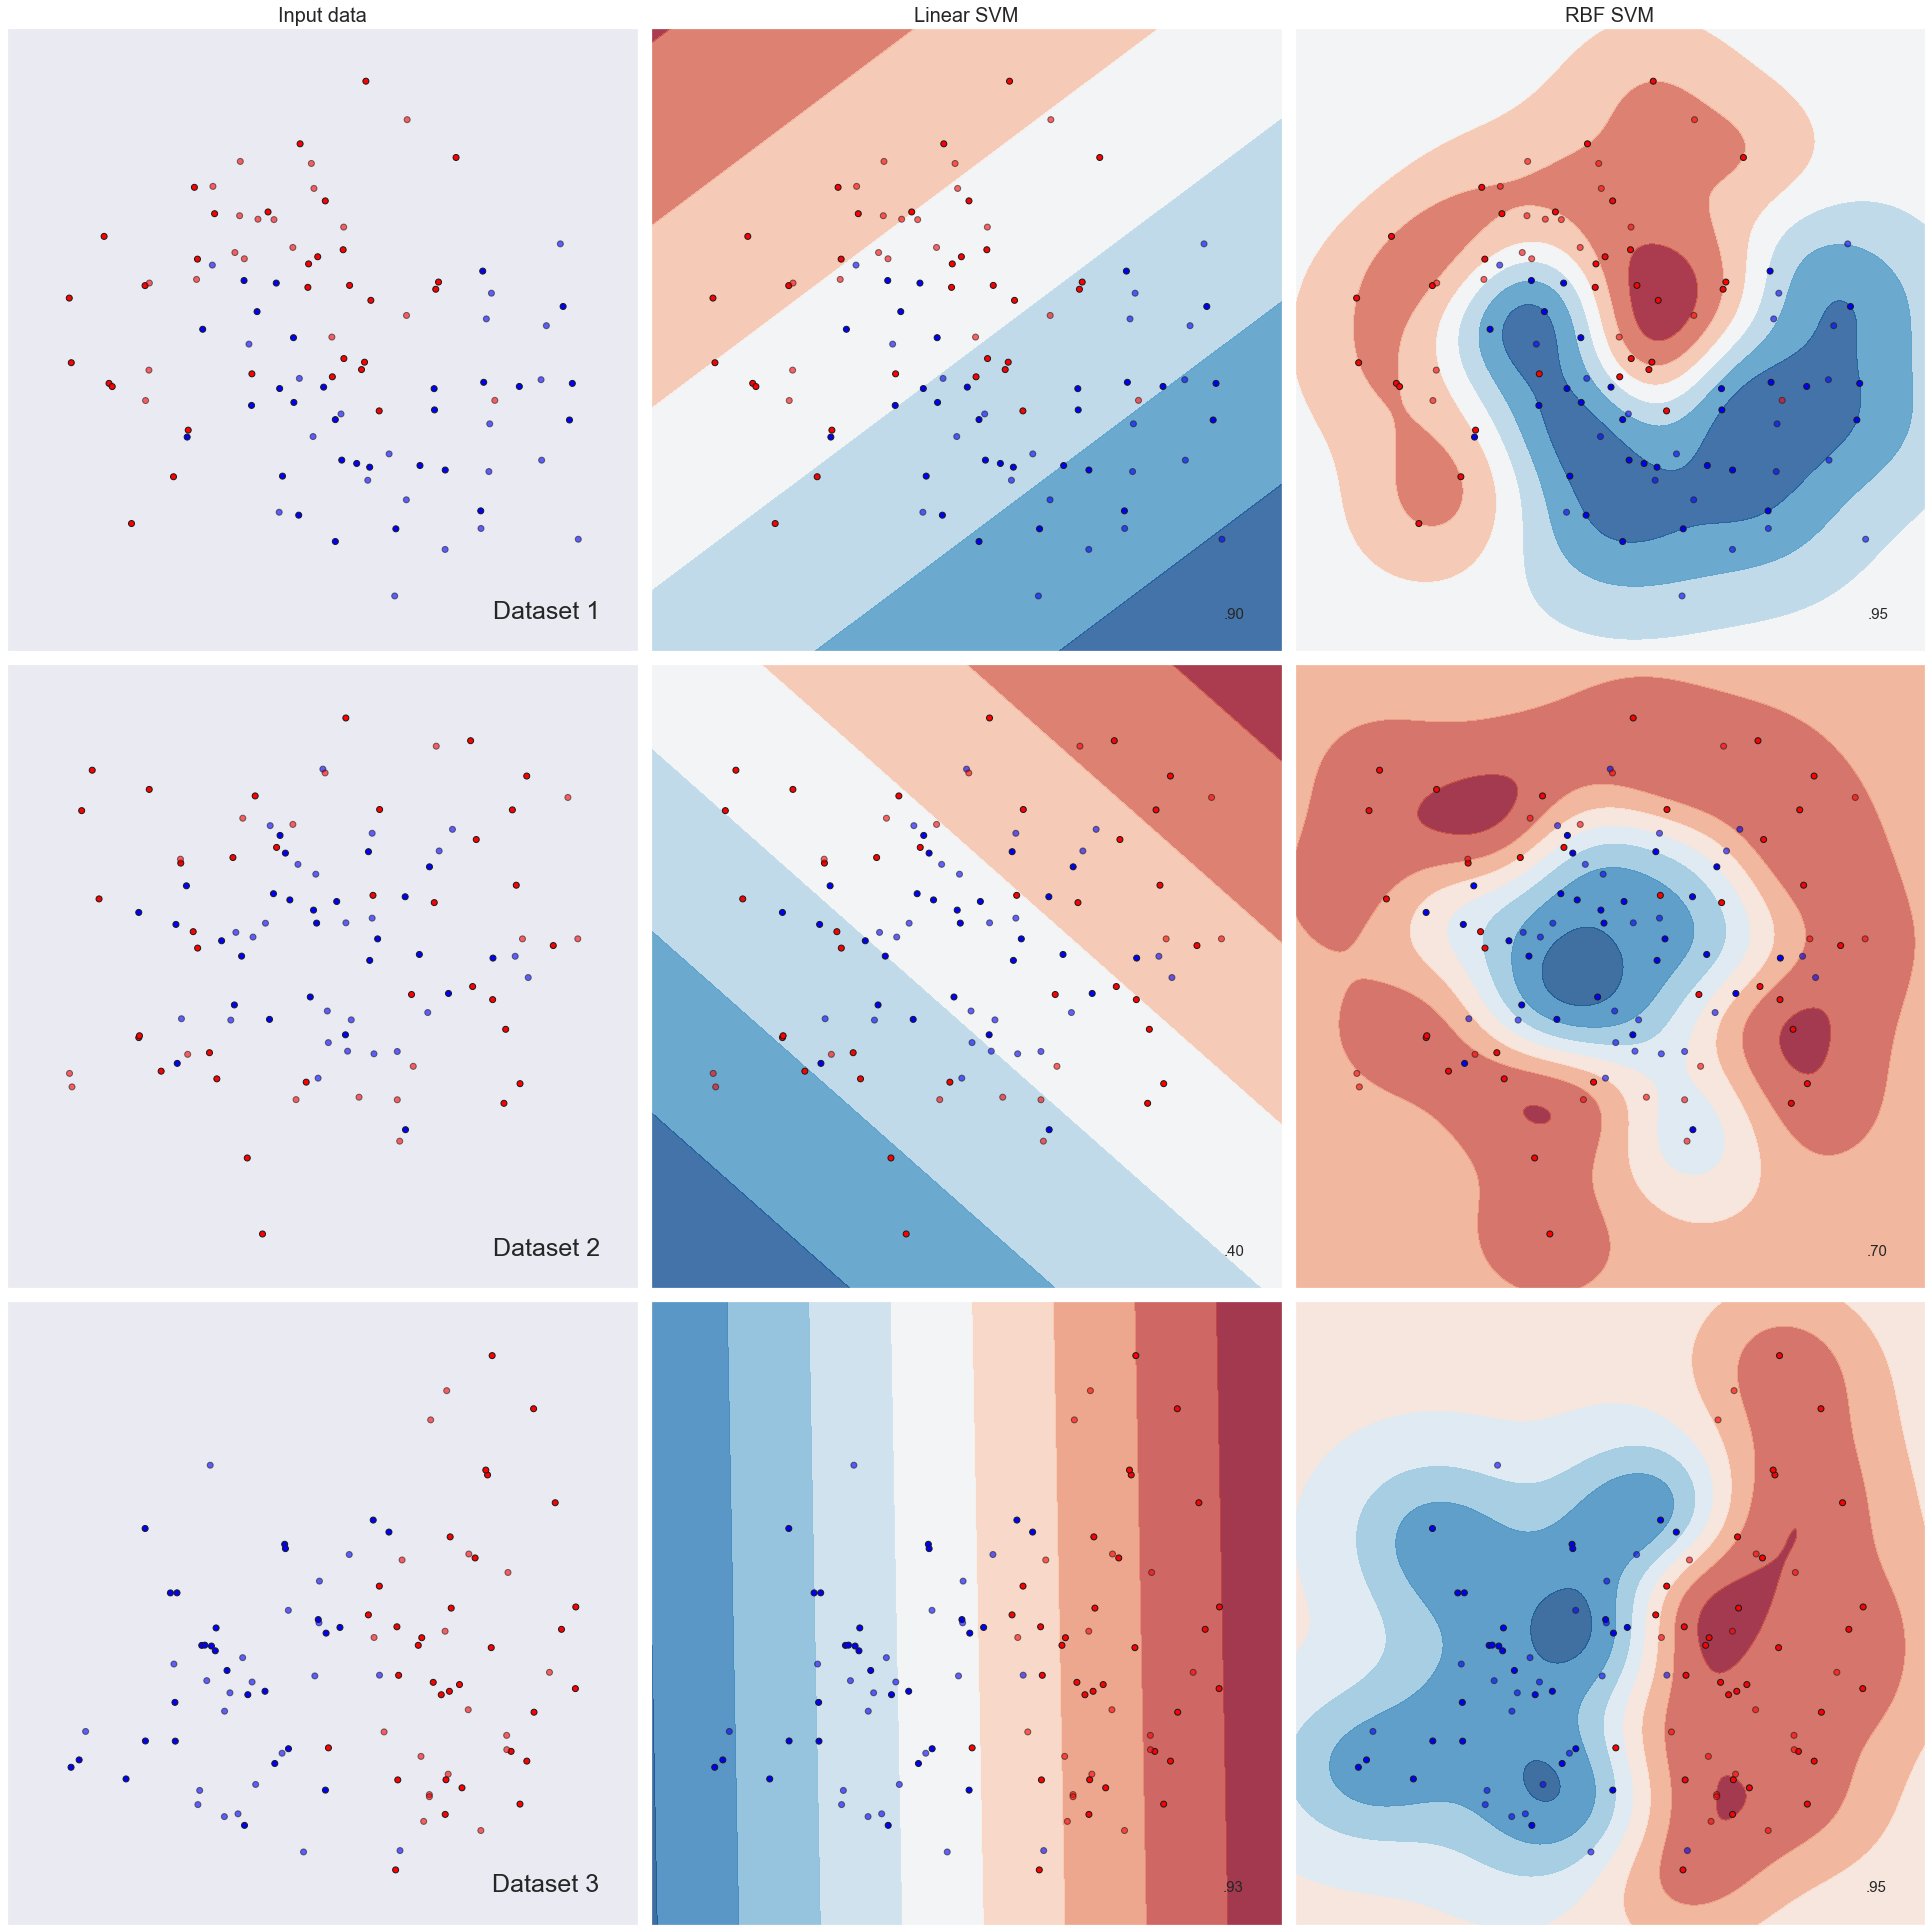

In [605]:
figure = plt.figure(figsize=(27, 27))
i=1
j=1
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data",fontsize=20)
    ax.text(xx.max() - .3, yy.min() + .3, "Dataset {}".format(j),
                                size=25, horizontalalignment='right')
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name,fontsize=20)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1
    j += 1
plt.tight_layout()
plt.show()


In [606]:
i=1

for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        predict_train = clf.predict(X_train)
        predict_test = clf.predict(X_test)
        cm = confusion_matrix(y_test, predict_test)
        print("Dataset {} :Confussion Matrix of {} is: \n {}".format(i,name,cm))
        print("Dataset {} :Classification report of {} is: \n {}".format(i,name,classification_report(y_test,predict_test)))
    i+=1

Dataset 1 :Confussion Matrix of Linear SVM is: 
 [[17  2]
 [ 2 19]]
Dataset 1 :Classification report of Linear SVM is: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.90      0.90      0.90        21

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40

Dataset 1 :Confussion Matrix of RBF SVM is: 
 [[18  1]
 [ 1 20]]
Dataset 1 :Classification report of RBF SVM is: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      0.95      0.95        21

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40

Dataset 2 :Confussion Matrix of Linear SVM is: 
 [[16  0]
 [24  0]]
Dataset 2 :Classification report of Linear

C:\Users\erick\.conda\envs\INFO-F422\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
